# Random Walks 
## Generate sequences
![Random walk](random_walk.png)

In [22]:
import numpy as np
np.random.seed(1)

In [23]:
def generate_sequence():
    walk_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G'}
    sequence_num = [3]
    sequence_states = ['D']
    curr_pos = 3
    while curr_pos != 0 and curr_pos !=6:
        if np.random.rand() >0.5:
            curr_pos +=1
        else:
            curr_pos -=1
        sequence_num.append(curr_pos)
        sequence_states.append(walk_dict[curr_pos])
    return sequence_states,sequence_num
        
#test 
generate_sequence()

(['D', 'C', 'D', 'C', 'B', 'A'], [3, 2, 3, 2, 1, 0])

## TD(Lmada)

In [24]:
def x(curr_pos,n):
    xt = np.zeros(n)
    xt[curr_pos]=1
    return xt
def dw(seq,w,lm,alpha):
    n = len(w)
    et = np.zeros(n)
    dw = np.zeros(n)
    for t in range(0,len(seq)-1): #leave the last w unchanged (terminating states)
        P_t1 = np.dot(w,x(seq[t+1],n))
        P_t = np.dot(w,x(seq[t],n))
        et = x(seq[t],n) + lm*et
        dw += alpha*(P_t1-P_t)*et
    
    return dw        

In [25]:
def error_rms(w):
    w_true = np.array([0,1/6,1/3,1/2,2/3,5/6,1.0])
    return np.sqrt(np.mean((w-w_true)**2))
#test 
w = np.array([0,0.1,0.1,0.1,0.1,0.1,1.0])
error_rms(w)

0.3923878871324318

In [26]:
x(3,7)

array([0., 0., 0., 1., 0., 0., 0.])

## Test TD($\lambda$)

In [27]:
seqs = [generate_sequence()[1] for i in range(100)]
for i in range(1000):
    w = np.array([0,0.2,0.2,0.2,0.2,0.2,1])
    for seq in seqs:
        w += dw(seq,w, 0.4, 0.2)
w,error_rms(w)

(array([0.        , 0.11535801, 0.27267915, 0.48750516, 0.63664301,
        0.65002252, 1.        ]),
 0.07650574497519909)

In [57]:
datasets = [[generate_sequence()[1] for i in range(5)] for j in range(100)]

## Experiement 1

In [58]:
def experiment_1(datasets,epsilon = 1e-3):
    lms = [0,0.1,0.3,0.5,0.7,0.9,1.0]
    alpha = 0.01
    #datasets = [[generate_sequence()[1] for i in range(10)] for j in range(100)]
    errors_lms = np.zeros(len(lms))
    for j,lm in enumerate(lms):
        #print("iteration for lamda: ",lm)    
        errors_datasets = np.zeros(len(datasets))
        for m,dataset in enumerate(datasets):
            #print("dataset {} started ".format(m))
            w = np.array([0,0.5,0.5,0.5,0.5,0.5,1]) 
            while True:
                dw_sum = 0
                for seq in dataset:
                    change =dw(seq,w,lm,alpha)
                    dw_sum += change
                if max(abs(dw_sum)) < epsilon:
                    break
                w += dw_sum
            errors_datasets[m] = error_rms(w)
        errors_lms[j] = np.mean(errors_datasets)
    return errors_lms, lms
exp1_errors, exp1_lm =experiment_1(datasets)

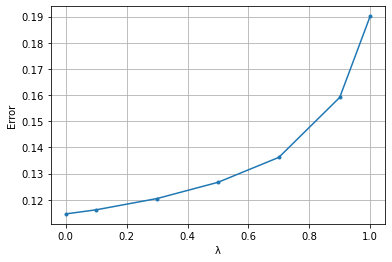

In [59]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(exp1_lm,exp1_errors,'.-')
plt.xlabel('λ')
plt.ylabel('Error')
plt.grid()
plt.savefig("Figure3.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Experiement 2

In [60]:
def experiment_2(datasets,epsilon = 1e-3):
    lms = [0,0.3,0.8,1.0]
    alphas = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]
    datasets = [[generate_sequence()[1] for i in range(5)] for j in range(100)]
    
    errors_lms = np.zeros((len(lms),len(alphas)))
    for j,lm in enumerate(lms):
        #print("iteration for lamda: ",lm)
        for n,alpha in enumerate(alphas):
            #print("iteration for alpha: ",alpha)
            errors_datasets = np.zeros(len(datasets))
            for m,dataset in enumerate(datasets):
                #print("dataset {} started ".format(m))
                w = np.array([0,0.5,0.5,0.5,0.5,0.5,1])
                for seq in dataset:
                    w += dw(seq,w,lm,alpha)
                errors_datasets[m] = error_rms(w)
                #print("dataset error: ",errors_datasets[m])
            mean_error = np.mean(errors_datasets)
            errors_lms[j,n] = mean_error
    
    return errors_lms, alphas
exp2_errors, exp2_alpha =experiment_2(datasets)

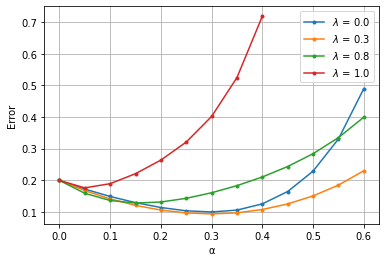

In [61]:
lms = np.array([0,0.3,0.8,1.0])
for i,alpha in enumerate(lms):
    if lms[i]== 1.0:
        plt.plot(exp2_alpha[:9],exp2_errors[i,:9],'.-',label="$\lambda$ = {}".format(lms[i]))
    else:
        plt.plot(exp2_alpha,exp2_errors[i],'.-',label="$\lambda$ = {}".format(lms[i]))
plt.legend()
plt.xlabel('α')
plt.grid()
plt.ylabel('Error')
plt.savefig("Figure4.pdf", format="pdf", bbox_inches="tight")


In [62]:
def experiment_3(datasets,epsilon = 1e-4):
    lms = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    alphas = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]
    #datasets = [[generate_sequence()[1] for i in range(5)] for j in range(100)]
    
    errors_lms = np.zeros(len(lms))
    for j,lm in enumerate(lms):
        #print("iteration for lamda: ",lm)
        min_error = float('inf') #to find min alpha 
        for alpha in alphas:
            #print("iteration for alpha: ",alpha)
            errors_datasets = np.zeros(len(datasets))
            for m,dataset in enumerate(datasets):
                #print("dataset {} started ".format(m))
                w = np.array([0,0.5,0.5,0.5,0.5,0.5,1]) 
                for seq in dataset:
                    w += dw(seq,w,lm,alpha)
                errors_datasets[m] = error_rms(w)
                #print("dataset error: ",errors_datasets[m])
            mean_error = np.mean(errors_datasets)
            if mean_error < min_error:
                min_error = mean_error
        errors_lms[j] = min_error
    
    return errors_lms, lms
exp3_errors, exp3_lm =experiment_3(datasets)

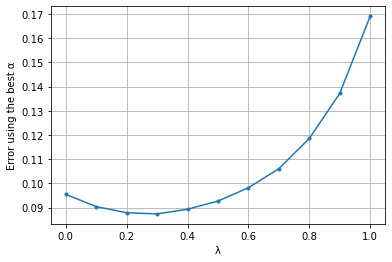

In [65]:
plt.plot(exp3_lm,exp3_errors,'.-')
plt.xlabel('λ')
plt.grid()
plt.ylabel('Error using the best α')
plt.savefig("Figure5.pdf", format="pdf", bbox_inches="tight")
plt.show()